import Pkg; Pkg.add("StatsBase")

In [4]:
using Entropies, DelayEmbeddings, StatsBase
import Distributions: Uniform, Normal

In [5]:
#Pkg.add("PyPlot")
using PyPlot

In [9]:
?RectangularBinning

search: RectangularBinning



```
RectangularBinning(ϵ) <: RectangularBinningScheme
```

Instructions for creating a rectangular box partition using the binning scheme `ϵ`.  Binning instructions are deduced from the type of `ϵ`.

Rectangular binnings may be automatically adjusted to the data in which the `RectangularBinning`  is applied, as follows:

1. `ϵ::Int` divides each coordinate axis into `ϵ` equal-length intervals,   extending the upper bound 1/100th of a bin size to ensure all points are covered.
2. `ϵ::Float64` divides each coordinate axis into intervals of fixed size `ϵ`, starting   from the axis minima until the data is completely covered by boxes.
3. `ϵ::Vector{Int}` divides the i-th coordinate axis into `ϵ[i]` equal-length   intervals, extending the upper bound 1/100th of a bin size to ensure all points are   covered.
4. `ϵ::Vector{Float64}` divides the i-th coordinate axis into intervals of fixed size `ϵ[i]`, starting   from the axis minima until the data is completely covered by boxes.

Rectangular binnings may also be specified on arbitrary min-max ranges. 

5. `ϵ::Tuple{Vector{Tuple{Float64,Float64}},Int64}` creates intervals   along each coordinate axis from ranges indicated by a vector of `(min, max)` tuples, then divides   each coordinate axis into an integer number of equal-length intervals. *Note: this does not ensure   that all points are covered by the data (points outside the binning are ignored)*.

# Example 1: Grid deduced automatically from data (partition guaranteed to cover data points)

## Flexible box sizes

The following binning specification finds the minima/maxima along each coordinate axis, then  split each of those data ranges (with some tiny padding on the edges) into `10` equal-length  intervals. This gives (hyper-)rectangular boxes, and works for data of any dimension.

```julia
using Entropies
RectangularBinning(10)
```

Now, assume the data consists of 2-dimensional points, and that we want a finer grid along one of the dimensions than over the other dimension.

The following binning specification finds the minima/maxima along each coordinate axis, then  splits the range along the first coordinate axis (with some tiny padding on the edges)  into `10` equal-length intervals, and the range along the second coordinate axis (with some  tiny padding on the edges) into `5` equal-length intervals. This gives (hyper-)rectangular boxes.

```julia
using Entropies
RectangularBinning([10, 5])
```

## Fixed box sizes

The following binning specification finds the minima/maxima along each coordinate axis,  then split the axis ranges into equal-length intervals of fixed size `0.5` until the all data  points are covered by boxes. This approach yields (hyper-)cubic boxes, and works for  data of any dimension.

```julia
using Entropies
RectangularBinning(0.5)
```

Again, assume the data consists of 2-dimensional points, and that we want a finer grid along one of the dimensions than over the other dimension.

The following binning specification finds the minima/maxima along each coordinate axis, then splits the range along the first coordinate axis into equal-length intervals of size `0.3`, and the range along the second axis into equal-length intervals of size `0.1` (in both cases,  making sure the data are completely covered by the boxes). This approach gives a (hyper-)rectangular boxes. 

```julia
using Entropies
RectangularBinning([0.3, 0.1])
```

# Example 2: Custom grids (partition not guaranteed to cover data points):

Assume the data consists of 3-dimensional points `(x, y, z)`, and that we want a grid  that is fixed over the intervals `[x₁, x₂]` for the first dimension, over `[y₁, y₂]` for the second dimension, and over `[z₁, z₂]` for the third dimension. We when want to split each of those ranges into 4 equal-length pieces. *Beware: some points may fall  outside the partition if the intervals are not chosen properly (these points are  simply discarded)*. 

The following binning specification produces the desired (hyper-)rectangular boxes. 

```julia
using Entropies, DelayEmbeddings

D = Dataset(rand(100, 3));

x₁, x₂ = 0.5, 1 # not completely covering the data, which are on [0, 1]
y₁, y₂ = -2, 1.5 # covering the data, which are on [0, 1]
z₁, z₂ = 0, 0.5 # not completely covering the data, which are on [0, 1]

ϵ = [(x₁, x₂), (y₁, y₂), (z₁, z₂)], 4 # [interval 1, interval 2, ...], n_subdivisions

RectangularBinning(ϵ)
```


In [6]:

Ns = [100:100:500; 1000:1000:10000]
Ekl = Vector{Vector{Float64}}(undef, 0)
Ekr = Vector{Vector{Float64}}(undef, 0)
Evf = Vector{Vector{Float64}}(undef, 0)

Bin = 10
b = Entropies.RectangularBinning(Bin)

est_knn = Kraskov(w = 2, k = 4)
est_vf = VisitationFrequency(b)
est_nn = KozachenkoLeonenko(w = 2)
# with k = 1, Kraskov is virtually identical to KozachenkoLeonenko, so pick a higher 
# number of neighbors




nreps = 10
for N in Ns
    kl = Float64[]
    kr = Float64[]
    vf = Float64[]
    for i = 1:nreps
        pts = Dataset([rand(Uniform(0, 1), 1) for i = 1:N]);
        push!(kl, genentropy(pts, est_nn))
         # with k = 1 almost identical
        push!(kr, genentropy(pts, est_knn))
        push!(vf, genentropy(pts, est_vf))
    end
    push!(Ekl, kl)
    push!(Ekr, kr)
    push!(Evf, vf)
end


UndefVarError: [91mUndefVarError: Kraskov not defined[39m

In [31]:
Bin = 10


LoadError: syntax: invalid iteration specification

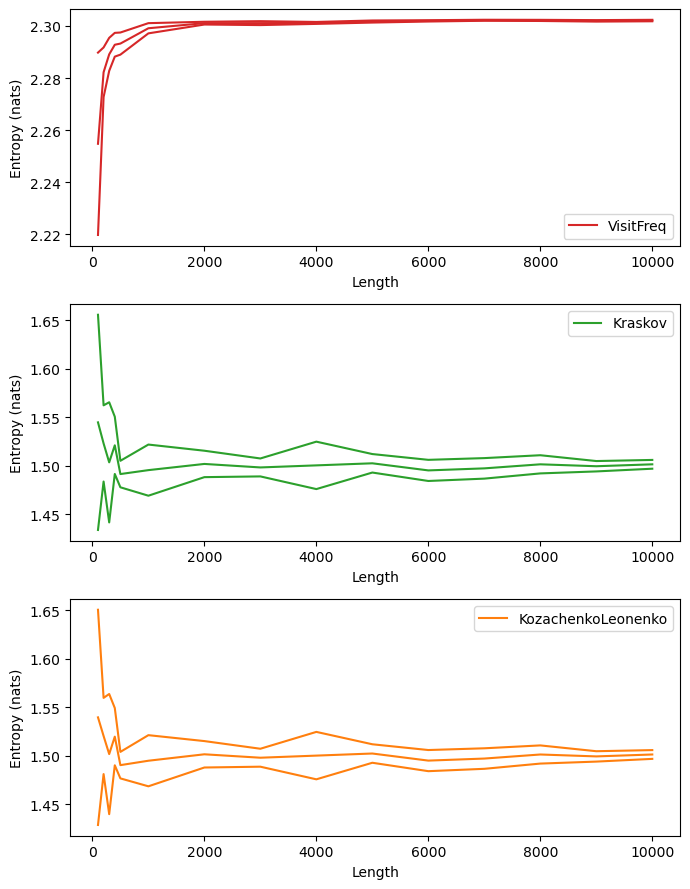

In [14]:
# Plot
f = figure(figsize = (7,9))
ax = subplot(313)
px = PyPlot.plot(Ns, mean.(Ekl); color = "C1", label = "KozachenkoLeonenko"); 
PyPlot.plot(Ns, mean.(Ekl) .+ StatsBase.std.(Ekl); color = "C1", label = ""); 
PyPlot.plot(Ns, mean.(Ekl) .- StatsBase.std.(Ekl); color = "C1", label = ""); 
xlabel("Length"); ylabel("Entropy (nats)"); legend()

ay = subplot(312)
py = PyPlot.plot(Ns, mean.(Ekr); color = "C2", label = "Kraskov"); 
PyPlot.plot(Ns, mean.(Ekr) .+ StatsBase.std.(Ekr); color = "C2", label = ""); 
PyPlot.plot(Ns, mean.(Ekr) .- StatsBase.std.(Ekr); color = "C2", label = ""); 
xlabel("Length"); ylabel("Entropy (nats)"); legend()

az = subplot(311)
pz = PyPlot.plot(Ns, mean.(Evf); color = "C3", label = "VisitFreq"); 
PyPlot.plot(Ns, mean.(Evf) .+ StatsBase.std.(Evf); color = "C3", label = ""); 
PyPlot.plot(Ns, mean.(Evf) .- StatsBase.std.(Evf); color = "C3", label = ""); 
xlabel("Length"); ylabel("Entropy (nats)"); legend()

tight_layout()
PyPlot.savefig("../plots/nn_entropy_example.png")